### Importação dos dados



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


**Adicionando Coluna Loja**

In [ ]:
loja['Loja_id'] = 'Loja 1'
loja2['Loja_id'] = 'Loja 2'
loja3['Loja_id'] = 'Loja 3'
loja4['Loja_id'] = 'Loja 4'
df_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
display(df_lojas)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja_id
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de jantar,moveis,303.60,16.852799,12/02/2020,Camila Ribeiro,RJ,5,cartao_credito,1,-22.25,-42.66,Loja 4
9431,Cadeira de escritório,moveis,456.02,24.812798,17/05/2022,Felipe Santos,PE,5,cartao_credito,3,-8.38,-37.86,Loja 4
9432,Copo térmico,esporte e lazer,48.99,3.139675,03/05/2022,Camila Ribeiro,SP,5,cartao_credito,1,-22.19,-48.79,Loja 4
9433,Jogo de panelas,utilidades domesticas,202.45,11.062979,15/06/2020,Bianca Santos,PR,5,cartao_credito,1,-24.89,-51.55,Loja 4


#1. Análise do faturamento



In [ ]:
loja.shape
loja.columns

Index(['Produto', 'Categoria do Produto', 'Preço', 'Frete', 'Data da Compra',
       'Vendedor', 'Local da compra', 'Avaliação da compra',
       'Tipo de pagamento', 'Quantidade de parcelas', 'lat', 'lon', 'Loja_id'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2359 entries, 0 to 2358
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Produto                 2359 non-null   object 
 1   Categoria do Produto    2359 non-null   object 
 2   Preço                   2359 non-null   float64
 3   Frete                   2359 non-null   float64
 4   Data da Compra          2359 non-null   object 
 5   Vendedor                2359 non-null   object 
 6   Local da compra         2359 non-null   object 
 7   Avaliação da compra     2359 non-null   int64  
 8   Tipo de pagamento       2359 non-null   object 
 9   Quantidade de parcelas  2359 non-null   int64  
 10  lat                     2359 non-null   float64
 11  lon                     2359 non-null   float64
 12  Loja_id                 2359 non-null   object 
dtypes: float64(4), int64(2), object(7)
memory usage: 239.7+ KB


In [ ]:
df_lojas["Preço"] = pd.to_numeric(df_lojas["Preço"], errors="coerce")

In [ ]:
faturamento = df_lojas.groupby("Loja_id")["Preço"].sum().reset_index()
faturamento["Preço"] = faturamento["Preço"].apply(lambda x: f"R$ {x:,.2f}".replace(",", "_").replace(".", ",").replace("_", "."))
faturamento = pd.DataFrame(faturamento)

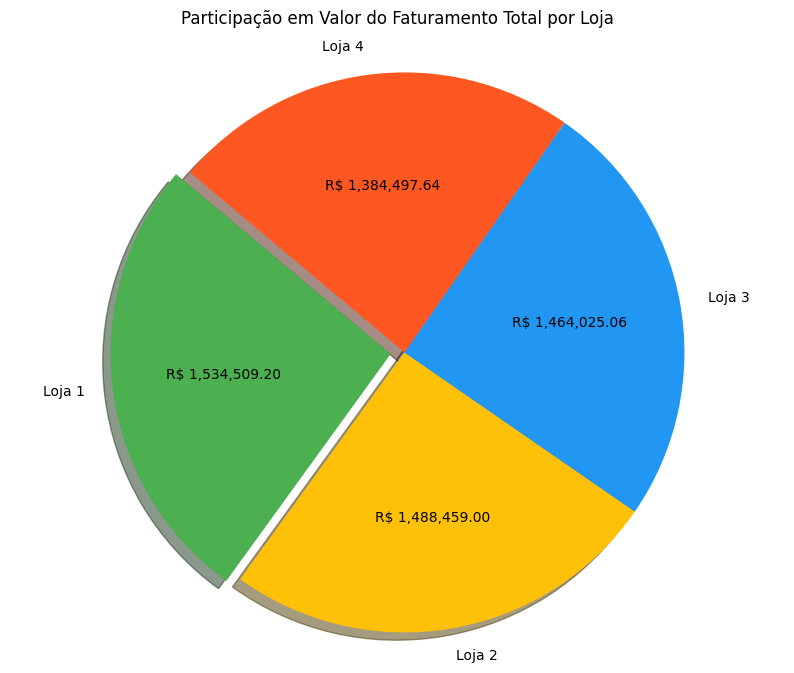

In [ ]:
# 1. Calcular o Faturamento Total por Loja e Ordenar
faturamento_total_loja = df_lojas.groupby('Loja_id')['Preço'].sum().sort_values(ascending=False)

# 2. Configuração do Gráfico de Pizza (Pie Chart)
labels = faturamento_total_loja.index
sizes = faturamento_total_loja.values
colors = ['#4CAF50', '#FFC107', '#2196F3', '#FF5722'] # Cores para as lojas
explode = (0.05, 0, 0, 0) # Destacar a loja com maior faturamento

plt.figure(figsize=(10, 8))
plt.pie(
    sizes,
    explode=explode,
    labels=labels,
    colors=colors,
    # Função que formata o rótulo para exibir o valor absoluto em Reais (R$)
    autopct=lambda p: f'R$ {p*sum(sizes)/100:,.2f}',
    shadow=True,
    startangle=140
)
plt.title('Participação em Valor do Faturamento Total por Loja', fontsize=12, y=1.02)
plt.axis('equal') # Garante que o gráfico de pizza seja circular.
plt.show()

# 2. Vendas por Categoria

In [ ]:
vendas_por_categoria = df_lojas.groupby('Categoria do Produto')['Preço'].sum().reset_index(name ='Total_de_Vendas').sort_values('Total_de_Vendas', ascending=False)
print(vendas_por_categoria)

    Categoria do Produto  Total_de_Vendas
2            eletronicos       2214099.72
1       eletrodomesticos       1766337.03
6                 moveis       1010214.00
4  instrumentos musicais        465029.67
3        esporte e lazer        190635.39
0             brinquedos         98140.86
7  utilidades domesticas         76773.38
5                 livros         50260.74


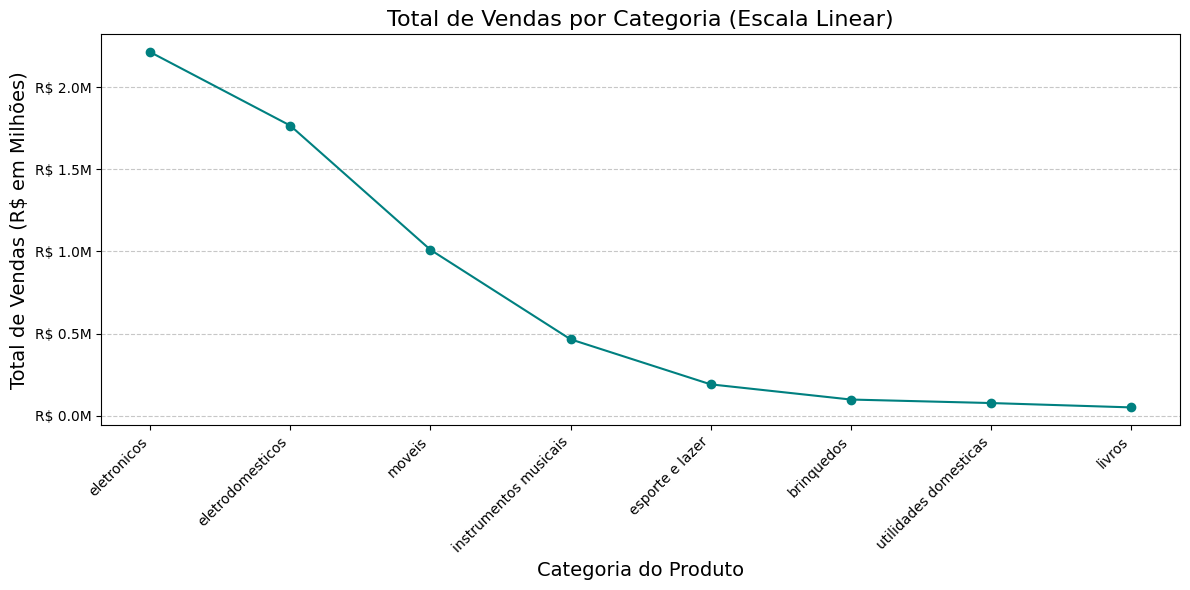

In [ ]:
from matplotlib.ticker import FuncFormatter

# Dados de vendas por categoria
data = {
    'Categoria do Produto': ['eletronicos', 'eletrodomesticos', 'moveis', 'instrumentos musicais', 'esporte e lazer', 'brinquedos', 'utilidades domesticas', 'livros'],
    'Total_de_Vendas': [2214099.72, 1766337.03, 1010214.00, 465029.67, 190635.39, 98140.86, 76773.38, 50260.74]
}
vendas_por_categoria = pd.DataFrame(data).sort_values('Total_de_Vendas', ascending=False)

# Criação do gráfico de linha com escala linear no eixo Y
plt.figure(figsize=(12, 6))
plt.plot(vendas_por_categoria['Categoria do Produto'], vendas_por_categoria['Total_de_Vendas'], marker='o', linestyle='-', color='teal')

# Função para formatar o eixo Y em milhões de Reais (R$ M)
def millions_formatter(x, pos):
    return f'R$ {x/1000000:.1f}M'

formatter = FuncFormatter(millions_formatter)
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Total de Vendas por Categoria (Escala Linear)', fontsize=16)
plt.xlabel('Categoria do Produto', fontsize=14)
plt.ylabel('Total de Vendas (R$ em Milhões)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas


In [ ]:
avaliacoes = df_lojas.groupby('Loja_id')['Avaliação da compra'].mean().reset_index(name='avaliacoes').sort_values('avaliacoes', ascending=False).round(2)
print(avaliacoes)

  Loja_id  avaliacoes
2  Loja 3        4.05
1  Loja 2        4.04
3  Loja 4        4.00
0  Loja 1        3.98


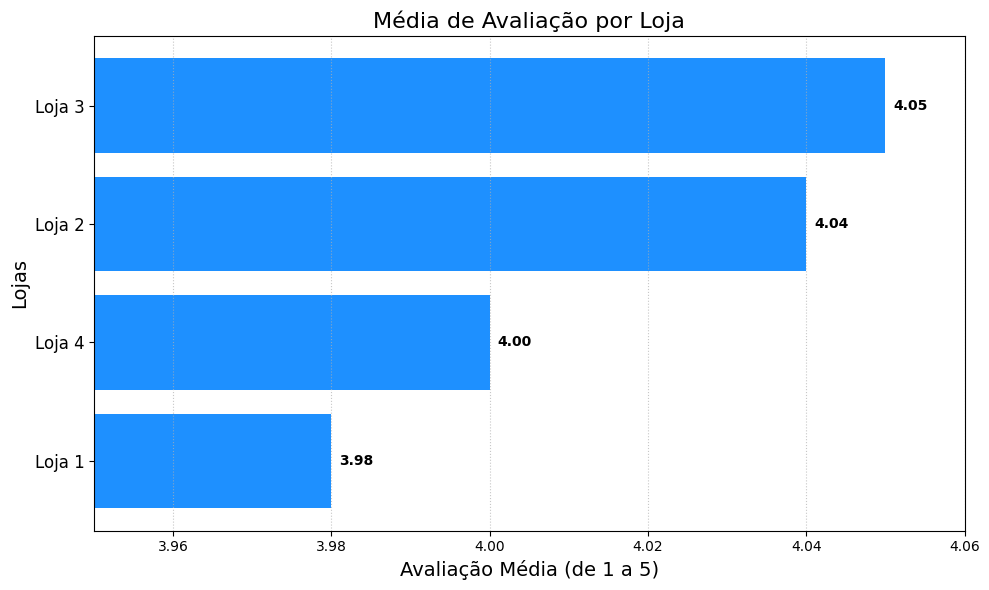

In [ ]:
avaliacoes = pd.DataFrame(avaliacoes)

# Ordenar por avaliação (ascendente) para um gráfico de barras horizontal limpo
avaliacoes = avaliacoes.sort_values(by='avaliacoes', ascending=True)

# Criar a posição Y
y_pos = range(len(avaliacoes))

plt.figure(figsize=(10, 6))

# Criar o gráfico de barras horizontal
bars = plt.barh(y_pos, avaliacoes['avaliacoes'], color='dodgerblue')

# Definir o limite do eixo X para destacar as pequenas diferenças
# Começando um pouco abaixo do mínimo (3.98) e indo um pouco acima do máximo (4.05)
plt.xlim(3.95, 4.06)

# Adicionar rótulos de dados (os valores) em cada barra
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.001, # Posição X (um pouco à direita da barra)
             bar.get_y() + bar.get_height() / 2, # Posição Y (centro da barra)
             f'{width:.2f}', # Texto (valor formatado)
             ha='left', va='center', fontweight='bold')

# Definir os nomes das lojas no eixo Y
plt.yticks(y_pos, avaliacoes['Loja_id'], fontsize=12)

# Títulos e Rótulos
plt.title('Média de Avaliação por Loja', fontsize=16)
plt.xlabel('Avaliação Média (de 1 a 5)', fontsize=14)
plt.ylabel('Lojas', fontsize=14)

plt.grid(axis='x', linestyle=':', alpha=0.7)
plt.tight_layout()

# Salvar o gráfico
plt.savefig('avaliacoes_bar_chart.png')

# 4. Produtos Mais e Menos Vendidos

In [ ]:
# Contagem de vendas por produto em cada loja
vendas_por_produto_loja = df_lojas.groupby(['Loja_id', 'Produto']).size().reset_index(name='Quantidade_vendida')
vendas_por_produto_loja

,Loja_id,Produto,Quantidade_vendida
0,Loja 1,Assistente virtual,40
1,Loja 1,Bateria,53
2,Loja 1,Bicicleta,54
3,Loja 1,Blocos de montar,56
4,Loja 1,Bola de basquete,55
...,...,...,...
199,Loja 4,Sofá retrátil,47
200,Loja 4,TV Led UHD 4K,40
201,Loja 4,Tablet ABXY,45
202,Loja 4,Violão,37


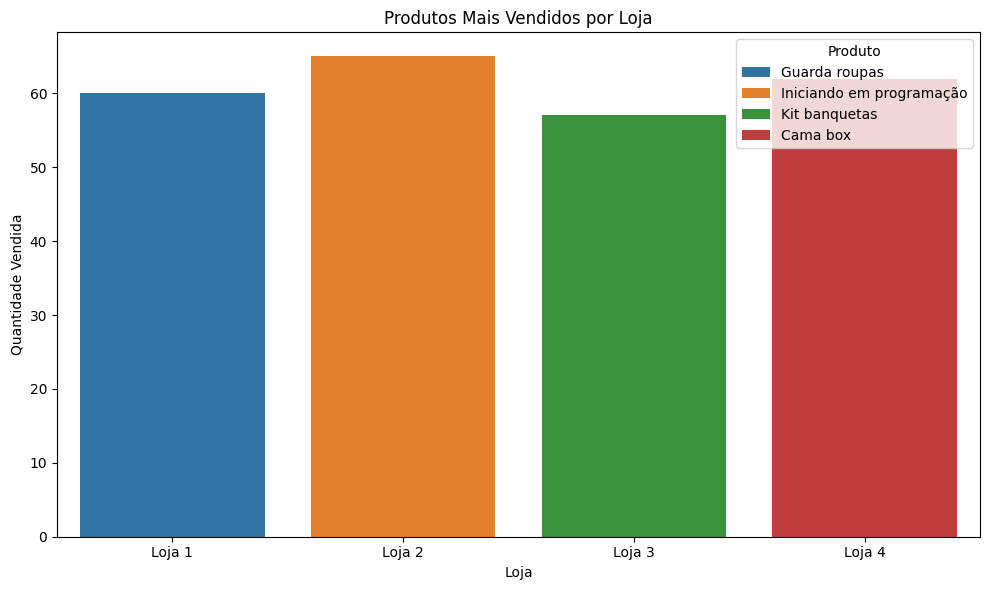

In [ ]:
# Separar os produtos mais vendidos por loja
mais_vendidos = vendas_por_produto_loja.loc[vendas_por_produto_loja.groupby('Loja_id')['Quantidade_vendida'].idxmax()]
mais_vendidos

# Gráfico dos mais vendidos
plt.figure(figsize=(10,6))
sns.barplot(data=mais_vendidos, x='Loja_id', y='Quantidade_vendida', hue='Produto')
plt.title('Produtos Mais Vendidos por Loja')
plt.ylabel('Quantidade Vendida')
plt.xlabel('Loja')
plt.legend(title='Produto')
plt.tight_layout()
plt.show()

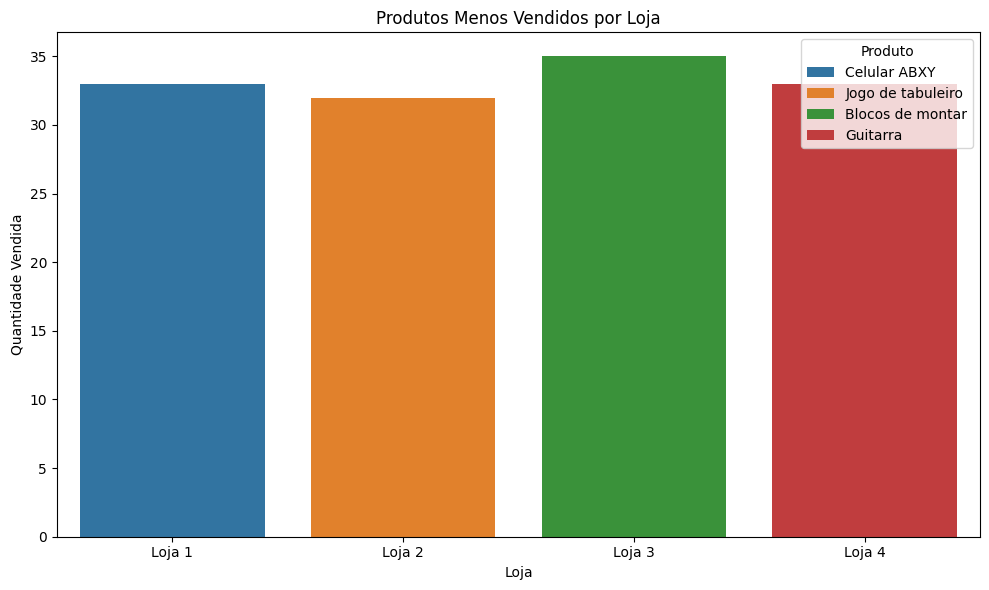

In [ ]:
# Separar os produtos menos vendidos por loja
menos_vendidos = vendas_por_produto_loja.loc[vendas_por_produto_loja.groupby('Loja_id')['Quantidade_vendida'].idxmin()]
menos_vendidos

# Gráfico dos menos vendidos
plt.figure(figsize=(10,6))
sns.barplot(data=menos_vendidos, x='Loja_id', y='Quantidade_vendida', hue='Produto')
plt.title('Produtos Menos Vendidos por Loja')
plt.ylabel('Quantidade Vendida')
plt.xlabel('Loja')
plt.legend(title='Produto')
plt.tight_layout()
plt.show()

In [ ]:
resumo = pd.merge(mais_vendidos, menos_vendidos, on='Loja_id', suffixes=('_mais_vendido', '_menos_vendido'))
print(resumo[['Loja_id', 'Produto_mais_vendido', 'Quantidade_vendida_mais_vendido', 'Produto_menos_vendido', 'Quantidade_vendida_menos_vendido']])

  Loja_id      Produto_mais_vendido  Quantidade_vendida_mais_vendido  \
0  Loja 1             Guarda roupas                               60   
1  Loja 2  Iniciando em programação                               65   
2  Loja 3             Kit banquetas                               57   
3  Loja 4                  Cama box                               62   

  Produto_menos_vendido  Quantidade_vendida_menos_vendido  
0          Celular ABXY                                33  
1     Jogo de tabuleiro                                32  
2      Blocos de montar                                35  
3              Guitarra                                33  


# 5. Frete Médio por Loja

In [ ]:
# Calcular o custo médio de frete por loja
frete_medio_por_loja = df_lojas.groupby('Loja_id')['Frete'].mean().reset_index()

# Renomear a coluna para facilitar a leitura
frete_medio_por_loja.columns = ['Loja_id', 'Frete_medio']
print(frete_medio_por_loja)

In [ ]:
# Preço médio por loja
preco_medio_por_loja = df_lojas.groupby('Loja_id')['Preço'].mean().reset_index()

# Juntar com o frete médio
comparativo = pd.merge(frete_medio_por_loja, preco_medio_por_loja, on='Loja_id')
comparativo['Percentual_frete'] = (comparativo['Frete_medio'] / comparativo['Preço']) * 100

print(comparativo)

# **Análise de Desempenho Geográfico**

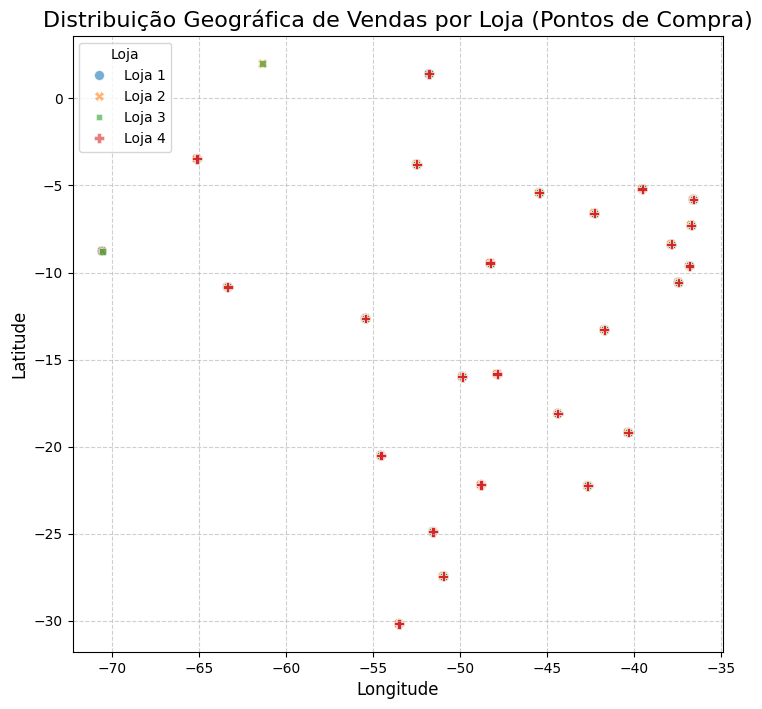

In [ ]:
# 1. Gráfico de Dispersão da Distribuição Geográfica das Vendas (por ponto de compra)
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_lojas,
    x='lon',
    y='lat',
    hue='Loja_id',
    style='Loja_id',
    s=50,
    alpha=0.6
)
plt.title('Distribuição Geográfica de Vendas por Loja (Pontos de Compra)', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.legend(title='Loja', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
# Ajusta o aspecto para que o mapa não fique distorcido
plt.gca().set_aspect('equal', adjustable='box')
plt.show() # Para visualizar no seu notebook



# **Relatório Final**



---
🎯 **Loja Recomendada para Venda: Loja 4**
- Minha justificativa leva em conta que a Loja 4 tem o menor faturamento e demonstra menor perda financeira caso seja vendida.

- Além disso, a Loja 4 tem menor potencial de crescimento, embora seja avaliada com nota 4.

- Vender a Loja 4 permite que o Senhor João concentre recursos nas unidades mais lucrativas (Loja 1) e nas que têm melhores avaliações (Loja 2 e 3).

- Contudo, a Loja 4 representa o ponto de menor retorno em relação às demais lojas



